Методичка по SQL: http://old.code.mu/sql/where.html

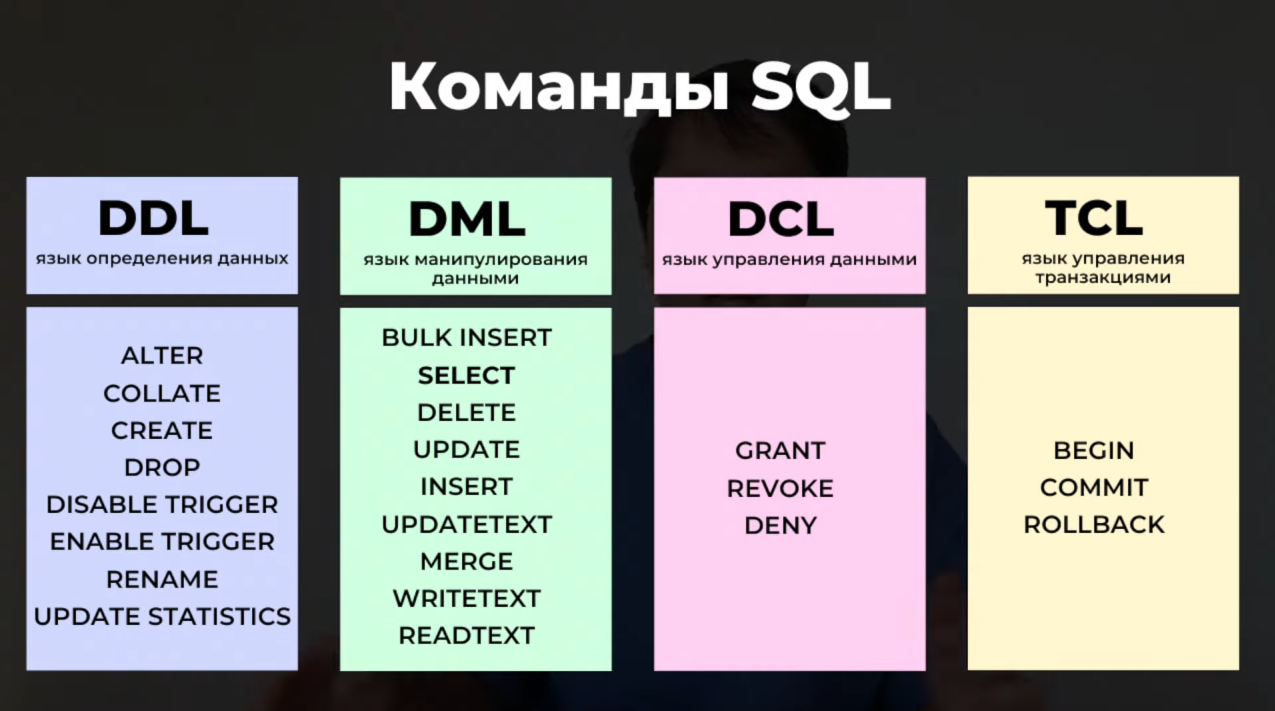

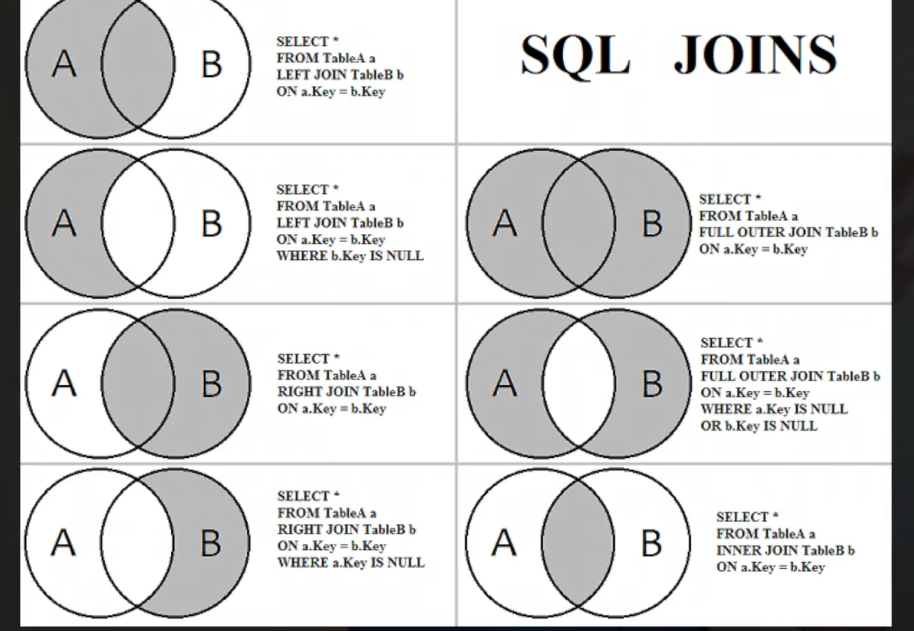

- Фильтрация
- Функции агрегирования
- Join
- Подзапросы
- Оконные функции

API - программный интерфейс для взаимодействия с СУБД

In [2]:
import sqlite3 as sq

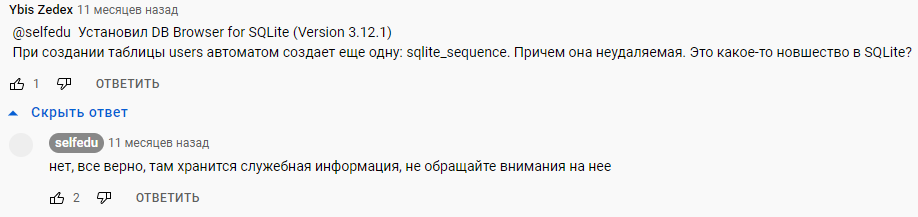

Ctr + Enter чтобы выполнить SQL запрс

In [4]:
with sq.connect("baza.db") as con:
    cur = con.cursor()
    
    #cur.execute("""DROP TABLE IF EXISTS users""")
    
    cur.execute("""CREATE TABLE IF NOT EXISTS users(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    sex INTEGER,
    old INTEGER,
    score INTEGER NOT NULL DEFAULT 0
    )""")

- SELECT * FROM users

# INSERT

INSERT – добавление записи в таблицу

Шаблоны:
- INSERT INTO table_name (column_name1, column_name2, ...) VALUES (value1, value2, …)
- INSERT INTO table_name VALUES (value1, value2, …)

Примеры:
- INSERT INTO users (name, sex, old, score) VALUES ("Ержан", 1, 46, 2100)
- INSERT INTO users VALUES (5, "Чича", 0, 15, 2100)

# SELECT

SELECT – выборка данных из таблиц (в том числе и при создании сводной выборки из нескольких таблиц)

Шаблоны:
- SELECT col1, col2, … FROM table_name

Примеры:
- SELECT name, score FROM users
- SELECT * FROM users

## Оператор WHERE

Шаблоны:
- SELECT col1, col2, … FROM table_name WHERE условие

после слова WHERE записывается логическое выражение и в качестве сравнения можно использовать следующие операторы:
- = или ==, >, <, >=, <=, !=, BETWEEN
- Вместо обычного равно также можно записывать и два равно. Это будет одно и то же.

Примеры:
- SELECT * FROM users WHERE score < 5000
- SELECT * FROM users WHERE score BETWEEN 3000 AND 5000
- SELECT * FROM users WHERE old = 20

## Составные условия

- AND – условное И: exp1 AND exp2. Истинно, если одновременно истинны exp1 и exp2.
- OR – условное ИЛИ: exp1 OR exp2. Истинно, если истинно exp1 или exp2 или оба выражения.
- NOT – условное НЕ: NOT exp. Преобразует ложное условие в истинное и, наоборот, истинное – в ложное.
- IN – вхождение во множество значений: col IN (val1, val2, …)
- NOT IN – не вхождение во множество значений: col NOT IN (val1, val2, …)

Примеры:
- SELECT * FROM users WHERE old > 20 AND score < 3000
- SELECT * FROM users WHERE old IN(15, 19) AND score < 2500
- SELECT * FROM users WHERE old IN(15, 19) AND NOT score > 2500

## Сортировка ORDER BY

После условия в команде SELECT можно дополнительно указывать сортировку записей по определенному столбцу.

Примеры:
- SELECT * FROM users WHERE score < 5000 ORDER BY old - сортировка по возрастанию
- SELECT * FROM users WHERE score < 5000 ORDER BY old DESC - сортировка по убыванию
- SELECT * FROM users WHERE score < 5000 ORDER BY old ASC - явное указание, что сортировка производится по возрастанию 

## Ограничение выборки LIMIT

LIMIT - Вывод первых 10 строк с наибольшим значением в столбце

OFFSET - Позволяет пропускать несколько первых записей

Шаблоны:
- LIMIT max OFFSET offset
- LIMIT offset, max

Примеры:
- SELECT * FROM users WHERE score > 100 ORDER BY score DESC LIMIT 5
- SELECT * FROM users WHERE score > 100 ORDER BY score DESC LIMIT 5 OFFSET 3
- SELECT * FROM users WHERE score > 100 ORDER BY score DESC LIMIT 3, 5

# Работа с выборкой в программе на Python

In [6]:
# with sq.connect("saper.db") as con:
#     cur = con.cursor()
#  
#     cur.execute("SELECT * FROM users WHERE score > 100 ORDER BY score DESC LIMIT 5")
#     result = cur.fetchall()
#     print(result)

# UPDATE

UPDATE - изменение данных в записях

Шаблоны:
- UPDATE имя_таблицы SET имя_столбца = новое_значение WHERE условие

Примеры:
- UPDATE users SET sex = 0
- UPDATE users SET score = 6600 WHERE rowid = 1 - Присваивание первой строке значение score = 6600
- UPDATE users SET score = score+500 WHERE sex = 2 - Добавление всем игрокам женского пола 500 очков
- UPDATE users SET score = 1500 WHERE name LIKE 'Ержан' - Присваивание игроку с name = 'Ержан' значение score = 1500
- UPDATE users SET score = score+100 WHERE name LIKE 'Ф%' - Игрокам, у которых имя начинается с буквы «Ф» будет добавлено 100 очков
- UPDATE users SET score = score+100 WHERE name LIKE 'В_ади%' - первую букву «В», за которой может идти произвольный символ, далее буквы "а", "д" и "и" и, затем, произвольный набор символов
- UPDATE users SET score = score+300, old = old+1 WHERE old >= 50 - замена сразу нескольких значений

# DELETE

Шаблоны:
- DELETE FROM имя_таблицы WHERE условие

Примеры:
- DELETE FROM users WHERE rowid IN(5, 7) - Удаление 5 и 7 строки

P.S. После удаления, когда мы добавим новую строку, её номер (id) будет 8.  так как это поле автоматически принимает следующее значение. Поэтому оно не равно порядковому номеру записи в таблице, это лишь некое уникальное числовое значение записи и не более того.

# Агрегирующие функции в SELECT

В команде SELECT можно использовать следующие наиболее распространенные агрегирующие функции:
- count() – подсчет числа записей;
- sum() – подсчет суммы указанного поля по всем записям выборки;
- avr() – вычисление среднего арифметического указанного поля;
- min() – нахождение минимального значения для указанного поля;
- max() – нахождение максимального значения для указанного поля.

Примеры:
- SELECT count(old) FROM users WHERE sex = 2 - подсчитывает число не Null записей в столбце old, для столбцов, в которых sex = 2
- SELECT count(old) as colichestvo FROM users WHERE sex = 2 - также дает название colichestvo столбцу с количеством
- SELECT count(DISTINCT sex) as colichestvo FROM users - считает количество уникальных значений
- SELECT sum(score) as sum FROM users WHERE old > 40 - подсчет суммы
- SELECT max(score) FROM users WHERE old < 30 - подсчет максимума

# Группировка GROUP BY

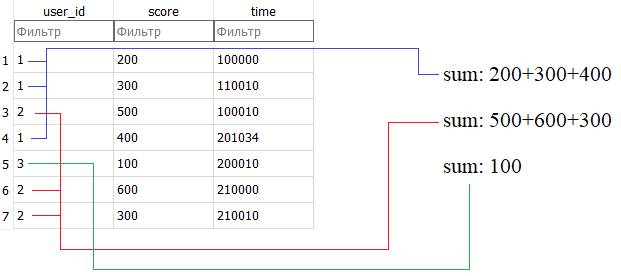

SELECT name, sum(score) as sum 
FROM users
WHERE score > 2500
GROUP BY name
ORDER BY sum DESC
LIMIT 2

Обратите внимание на порядок записи операторов в команде SELECT и порядок их работы. Сначала будут отобраны все записи с числом очков более 300, затем, они сгруппируются и отсортируются по убыванию очков.

# Оператор JOIN

In [12]:
with sq.connect("baza22.db") as con:
    cur = con.cursor()
    
    #cur.execute("""DROP TABLE IF EXISTS games"")
    
    cur.execute("""CREATE TABLE IF NOT EXISTS games(
    user_id INTEGER,
    score INTEGER,
    time INTEGER
    )""")

In [14]:
with sq.connect("baza22.db") as con:
    cur = con.cursor()
    
    #cur.execute("""DROP TABLE IF EXISTS users"")
    
    cur.execute("""CREATE TABLE IF NOT EXISTS users(
    rowid INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    sex INTEGER,
    old INTEGER,
    score INTEGER NOT NULL DEFAULT 0
    )""")

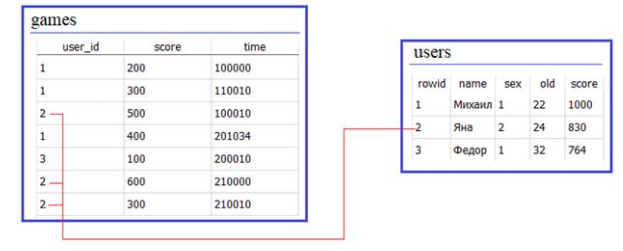

Шаблоны:
- JOIN <таблица> ON <условие связывания>

Объединим столбцы name, sex со столбцом score из таблицы games (INNER JOIN):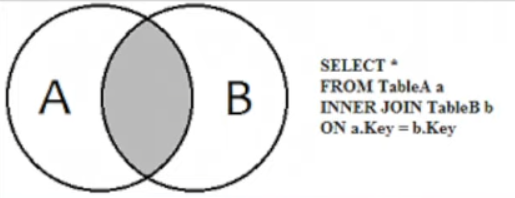

SELECT name, sex, games.score FROM games\
JOIN users ON games.user_id = users.rowid

Или так:

SELECT name, sex, games.score FROM users, games

LEFT JOIN:
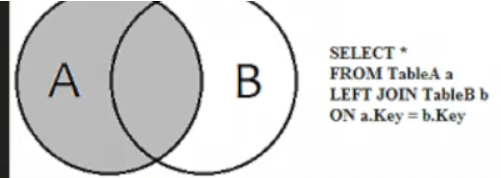

SELECT name, sex, games.score FROM games\
LEFT JOIN users ON games.user_id = users.rowid

# Оператор UNION объединения нескольких таблиц (снизу):

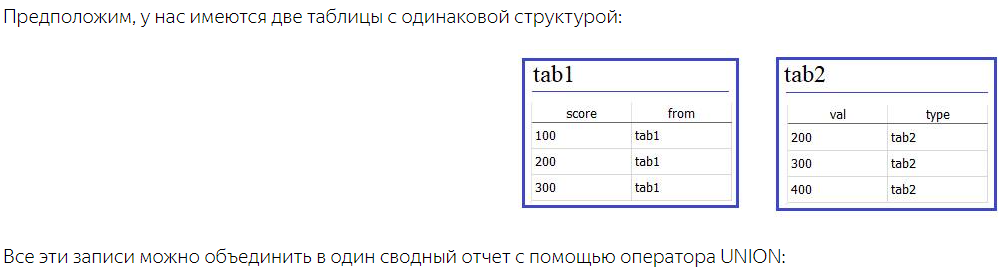

In [1]:
# SELECT score, `from` FROM tab1
# UNION SELECT val, type FROM tab2

Результат:
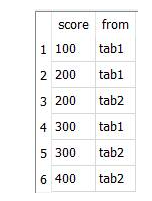

# Вложенные SQL-запросы

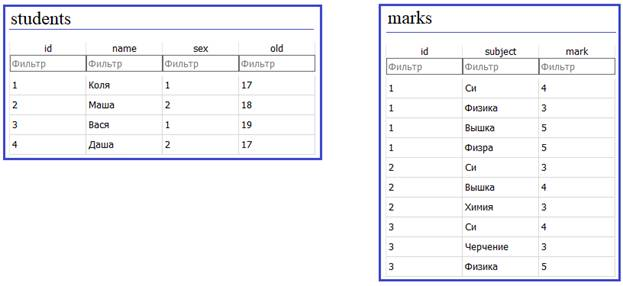

Пусть нам требуется выбрать всех студентов, у которых оценка по языку Си выше, чем у Маши (студент с id = 2).

По идее нам тут нужно реализовать два запроса: первый получает значение оценки для Маши по языку Си:

SELECT mark FROM marks\
WHERE id = 2 AND subject LIKE 'Си'

А второй выбирает всех студентов, у которых оценка по этому предмету выше, чем у Маши:

SELECT name, subject, mark FROM marks\
JOIN students ON students.rowid = marks.id\
WHERE mark > 3 AND subject LIKE 'Си'

Так вот, в языке SQL эти два запроса можно объединить, используя идею вложенных запросов:

SELECT name, subject, mark FROM marks\
JOIN students ON students.rowid = marks.id\
WHERE mark > (SELECT mark FROM marks\
WHERE id = 2 AND subject LIKE 'Си')\
AND subject LIKE 'Си'

## Вложения в команде INSERT

Предположим, что у нас имеется еще одна таблица female вот с такой структурой: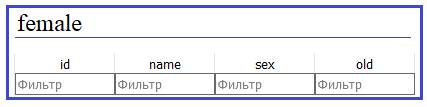

Пример:\
Задача добавить в female всех студентов женского пола.

INSERT INTO female\
SELECT NULL, name, sex, old FROM students WHERE sex = 2

## Вложения в команде UPDATE

Пример:\
Мы хотим обнулить все оценки в таблице marks, которые меньше или равны минимальной оценки студента с id = 1.

UPDATE marks SET mark = 0\
WHERE mark <= (SELECT min(mark) FROM marks WHERE id = 1)

## Вложения в команде DELETE

Пример:\
Требуется удалить из таблицы students всех студентов, возраст которых меньше, чем у Маши (студента с id = 2). 

DELETE FROM students\
WHERE old < (SELECT old FROM students WHERE id = 2)

# Stepik, Интерактивный тренажер по SQL

Информация о данных
- DESC book

xxxxxxxx

## 1.2 Выборка данных

1) Выборка всех данных из таблицы
- SELECT * FROM book

2) Выборка отдельных столбцов
- SELECT author, title, price FROM book

3) Выборка новых столбцов и присвоение им новых имен
- SELECT title AS 'Название', author AS 'Автор' FROM book

4) Для упаковки каждой книги требуется один лист бумаги, цена которого 1 рубль 65 копеек. Посчитать стоимость упаковки для каждой книги (сколько денег потребуется, чтобы упаковать все экземпляры книги). В запросе вывести название книги, ее количество и стоимость упаковки, последний столбец назвать pack.
- SELECT title, amount, amount*1.65 AS pack FROM book

5) В конце года цену всех книг на складе пересчитывают – снижают ее на 30%. Написать SQL запрос, который из таблицы book выбирает названия, авторов, количества и вычисляет новые цены книг. Столбец с новой ценой назвать new_price, цену округлить до 2-х знаков после запятой. 
- SELECT title, author, amount, ROUND(price*0.7, 2) AS new_price FROM book

6) Решили поднять цену книг Булгакова на 10%, а цену книг Есенина - на 5%. Написать запрос, куда включить автора, название книги и новую цену, последний столбец назвать new_price. Значение округлить до двух знаков после запятой.
- SELECT author, title, ROUND(IF(author='Булгаков М.А.',price\*1.1, IF(author='Есенин С.А.',price*1.05, price)),2)  AS 'new_price' FROM book 

7) Вывести автора, название  и цены тех книг, количество которых меньше 10.
- SELECT author, title, price from book WHERE amount<10

8) Вывести название, автора,  цену  и количество всех книг, цена которых меньше 500 или больше 600, а стоимость всех экземпляров этих книг больше или равна 5000.
- SELECT title, author, price, amount FROM book WHERE (price<500 OR price>600) and amount\*price>=5000

9) Вывести название и авторов тех книг, цены которых принадлежат интервалу от 540.50 до 800 (включая границы),  а количество или 2, или 3, или 5, или 7.
- SELECT title, author FROM book WHERE (price BETWEEN 540.50 and 800) and (amount IN(2,3,5,7))

10) Вывести  автора и название  книг, количество которых принадлежит интервалу от 2 до 14 (включая границы). Информацию  отсортировать сначала по авторам (в обратном алфавитном порядке), а затем по названиям книг (по алфавиту).
- SELECT author, title FROM book WHERE amount BETWEEN 2 and 14 ORDER BY author DESC, title

Сортировка только по author DESC:
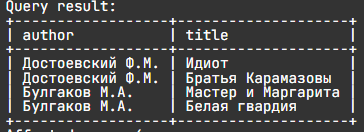

Сортировка по author DESC и title:
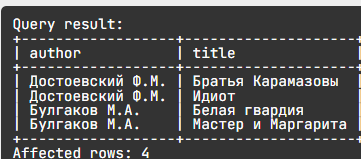

11) Вывести название и автора тех книг, название которых состоит из двух и более слов, а инициалы автора содержат букву «С». Считать, что в названии слова отделяются друг от друга пробелами и не содержат знаков препинания, между фамилией автора и инициалами обязателен пробел, инициалы записываются без пробела в формате: буква, точка, буква, точка. Информацию отсортировать по названию книги в алфавитном порядке.
- SELECT title, author FROM book WHERE title LIKE '_% %' and author LIKE '%С.%' ORDER BY title

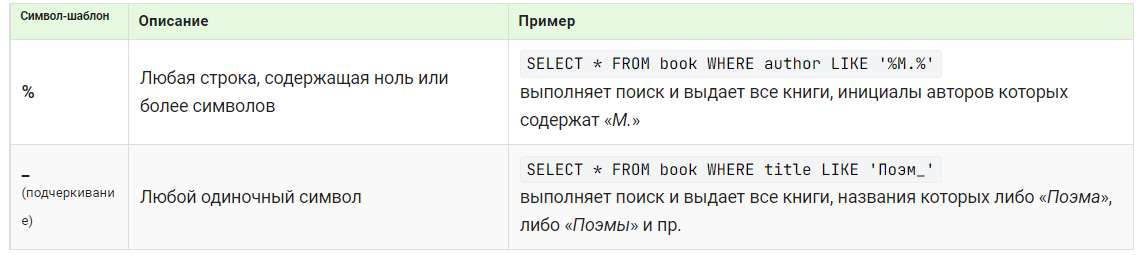

12) Магазин счёл, что классика уже не пользуется популярностью, поэтому необходимо в выборке:
1. Сменить всех авторов на "Донцова Дарья".
2. К названию каждой книги в начале дописать "Евлампия Романова и".
3. Цену поднять на 42%.
4. Отсортировать по убыванию цены и убыванию названия.
- SELECT 'Донцова Дарья' AS author, CONCAT('Евлампия романова и ',title) AS title, ROUND(price\*1.42, 2) AS price FROM book ORDER BY price DESC, title DESC

## 1.3 Запросы, групповые операции

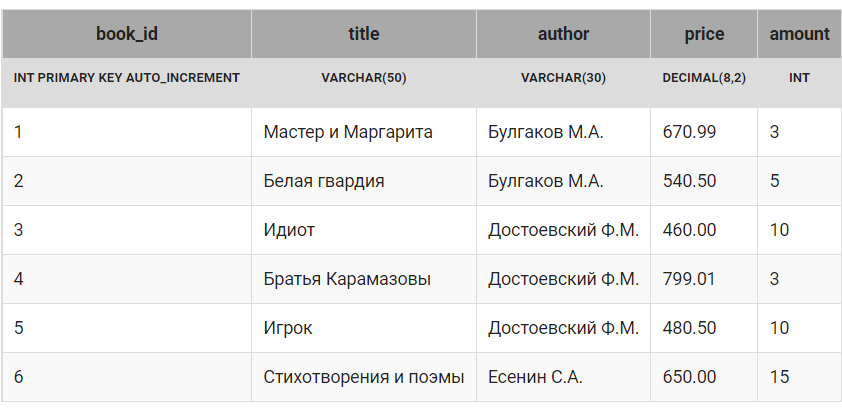

1) Отобрать различные (уникальные) элементы столбца amount таблицы book.
- SELECT DISTINCT amount FROM book;

2) Посчитать, количество различных книг и количество экземпляров книг каждого автора , хранящихся на складе.  Столбцы назвать Автор, Различных_книг и Количество_экземпляров соответственно.
- SELECT author AS 'Автор', COUNT(\*) AS 'Различных_книг', SUM(amount) AS 'Количество_экземпляров'
FROM book
GROUP BY author;

3) Вывести фамилию и инициалы автора, минимальную, максимальную и среднюю цену книг каждого автора . Вычисляемые столбцы назвать Минимальная_цена, Максимальная_цена и Средняя_цена соответственно.
- SELECT author, MIN(price) AS Минимальная_цена,
MAX(price) AS Максимальная_цена,
AVG(price) AS Средняя_цена
FROM book
GROUP BY author;

4) Для каждого автора вычислить суммарную стоимость книг S (имя столбца Стоимость), а также вычислить налог на добавленную стоимость  для полученных сумм (имя столбца НДС ) , который включен в стоимость и составляет k = 18%,  а также стоимость книг  (Стоимость_без_НДС) без него. Значения округлить до двух знаков после запятой. В запросе для расчета НДС(tax)  и Стоимости без НДС(S_without_tax) использовать следующие формулы: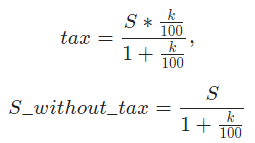
- SELECT author, ROUND(SUM(price\*amount),2) AS Стоимость, ROUND(SUM(price\*amount)\*0.18/1.18,2) AS НДС, ROUND(SUM(price\*amount)/1.18,2) AS Стоимость_без_НДС FROM book GROUP BY author

5) Вывести  цену самой дешевой книги, цену самой дорогой и среднюю цену уникальных книг на складе. Названия столбцов Минимальная_цена, Максимальная_цена, Средняя_цена соответственно. Среднюю цену округлить до двух знаков после запятой.
- SELECT MIN(price) AS Минимальная_цена,
MAX(price) AS Максимальная_цена,
ROUND(AVG(price), 2) AS Средняя_цена 
FROM book

6) Вычислить среднюю цену и суммарную стоимость тех книг, количество экземпляров которых принадлежит интервалу от 5 до 14, включительно. Столбцы назвать Средняя_цена и Стоимость, значения округлить до 2-х знаков после запятой.
- SELECT ROUND(AVG(price), 2) AS Средняя_цена,\
ROUND(SUM(price\*amount), 2) AS Стоимость\
FROM book WHERE amount>=5 AND amount<=14

Порядок (последовательность) выполнения  SQL запроса на выборку на СЕРВЕРЕ:
1) FROM\
2) WHERE\
3) GROUP BY\
4) HAVING\
5) SELECT\
6) ORDER BY

7) Посчитать стоимость всех экземпляров каждого автора без учета книг «Идиот» и «Белая гвардия». В результат включить только тех авторов, у которых суммарная стоимость книг (без учета книг «Идиот» и «Белая гвардия») более 5000 руб. Вычисляемый столбец назвать Стоимость. Результат отсортировать по убыванию стоимости. 
- SELECT author,\
SUM(price\*amount) AS Стоимость\
FROM book\
WHERE title <> 'Идиот' AND title <> 'Белая гвардия'\
GROUP BY author\
HAVING SUM(price*amount)>5000\
ORDER BY Стоимость DESC

8) Узнать сколько авторов, у которых есть книги со стоимостью более 500 и количеством более 1 шт на складе, при количестве различных названий произведений не менее 2-х. Вывести автора, количество различных произведений автора, минимальную цену и количество книг на складе.
- SELECT author,\
COUNT(\*),\
MIN(price),\
SUM(amount)\\
FROM book\
WHERE amount>1 AND price>500\
GROUP BY author\
HAVING COUNT(*)>=2

## 1.4 Вложенные запросы

1)  Вывести информацию (автора, название и цену) о  книгах, цены которых меньше или равны средней цене книг на складе. Информацию вывести в отсортированном по убыванию цены виде. Среднее вычислить как среднее по цене книги.
- SELECT author, title, price \
FROM book\
WHERE price <= (SELECT AVG(price) FROM book)\
ORDER BY price DESC

2) Вывести информацию (автора, название и цену) о тех книгах, цены которых превышают минимальную цену книги на складе не более чем на 150 рублей в отсортированном по возрастанию цены виде.
- SELECT author, title, price \
FROM book\
WHERE price <= (SELECT MIN(price) FROM book)+150\
ORDER BY price

3) Вывести информацию (автора, книгу и количество) о тех книгах, количество экземпляров которых в таблице book не дублируется.
- SELECT author, title, amount\
FROM book\
WHERE amount IN(\
    SELECT DISTINCT amount FROM book GROUP BY amount HAVING COUNT(amount)=1);

4) Вывести информацию о книгах(автор, название, цена), цена которых меньше самой большой из минимальных цен, вычисленных для каждого автора.
- SELECT author, title, price \
FROM book \
WHERE price < ANY (SELECT MIN(price) FROM book GROUP BY author)

5) Посчитать сколько и каких экземпляров книг нужно заказать поставщикам, чтобы на складе стало одинаковое количество экземпляров каждой книги, равное значению самого большего количества экземпляров одной книги на складе. Вывести название книги, ее автора, текущее количество экземпляров на складе и количество заказываемых экземпляров книг. Последнему столбцу присвоить имя Заказ. В результат не включать книги, которые заказывать не нужно.
- SELECT title, author, amount, \
    (SELECT MAX(amount) FROM book)-amount AS Заказ\
FROM book\
WHERE amount<(SELECT MAX(amount) FROM book)

6) Можно посмотреть, при продаже всех книг, какая книга принесет больше всего выручки, в процентах.
Судя по результату, магазин хорошо вложился в Стихи Есенина
- SELECT author, title, price, amount, \
ROUND(price\*amount/(SELECT SUM(price\*amount) FROM book)\*100, 2) AS Проценты\
FROM book \
ORDER BY Проценты DESC

## 1.5 Запросы корректировки данных

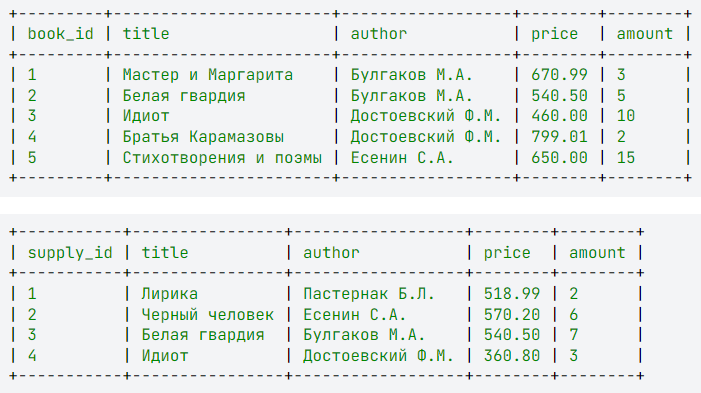

1) Занесите в таблицу supply четыре записи
- INSERT INTO supply VALUES\
(1, 'Лирика', 'Пастернак Б.Л.', 518.99, 2),\
(2, 'Черный человек', 'Есенин С.А.', 570.20, 6),\
(3, 'Белая гвардия', 'Булгаков М.А.', 540.50, 7),\
(4, 'Идиот', 'Достоевский Ф.М.', 360.80, 3)

2) Добавить из таблицы supply в таблицу book, все книги, кроме книг, написанных Булгаковым М.А. и Достоевским Ф.М.
- INSERT INTO book (title, author, price, amount) \
SELECT title, author, price, amount \
FROM supply WHERE author NOT IN ('Булгаков М.А.', 'Достоевский Ф.М.')

3) Занести из таблицы supply в таблицу book только те книги, авторов которых нет в  book.
- INSERT INTO book (title, author, price, amount)\
SELECT title, author, price, amount FROM supply\
WHERE author NOT IN(SELECT author FROM book)

4) Уменьшить на 10% цену тех книг в таблице book, количество которых принадлежит интервалу от 5 до 10, включая границы.
- UPDATE book SET price=price\*0.9\
WHERE amount BETWEEN 5 and 10

5) В таблице book необходимо скорректировать значение для покупателя в столбце buy таким образом, чтобы оно не превышало количество экземпляров книг, указанных в столбце amount. А цену тех книг, которые покупатель не заказывал, снизить на 10%.
- UPDATE book SET buy=IF(buy>amount, amount, buy), price=IF(buy=0, price*0.9, price)

6) Для тех книг в таблице book , которые есть в таблице supply, не только увеличить их количество в таблице book ( увеличить их количество на значение столбца amountтаблицы supply), но и пересчитать их цену (для каждой книги найти сумму цен из таблиц book и supply и разделить на 2).
- UPDATE book, supply \
SET book.amount = book.amount+supply.amount,\
book.price=(book.price+supply.price)/2\
WHERE book.title=supply.title AND book.author=supply.author

7) Удалить из таблицы supply книги тех авторов, общее количество экземпляров книг которых в таблице book превышает 10.
- DELETE FROM supply\
WHERE author IN(SELECT author FROM book GROUP BY author HAVING SUM(amount)>10)

8) Создать таблицу заказ (ordering), куда включить авторов и названия тех книг, количество экземпляров которых в таблице book меньше среднего количества экземпляров книг в таблице book. В таблицу включить столбец   amount, в котором для всех книг указать одинаковое значение - среднее количество экземпляров книг в таблице book.
- CREATE TABLE ordering AS\
SELECT author, title, (SELECT AVG(amount) FROM book) AS amount\
FROM book\
WHERE amount<(SELECT AVG(amount) FROM book)

## 1.6 Таблица "Командировки", запросы на выборку

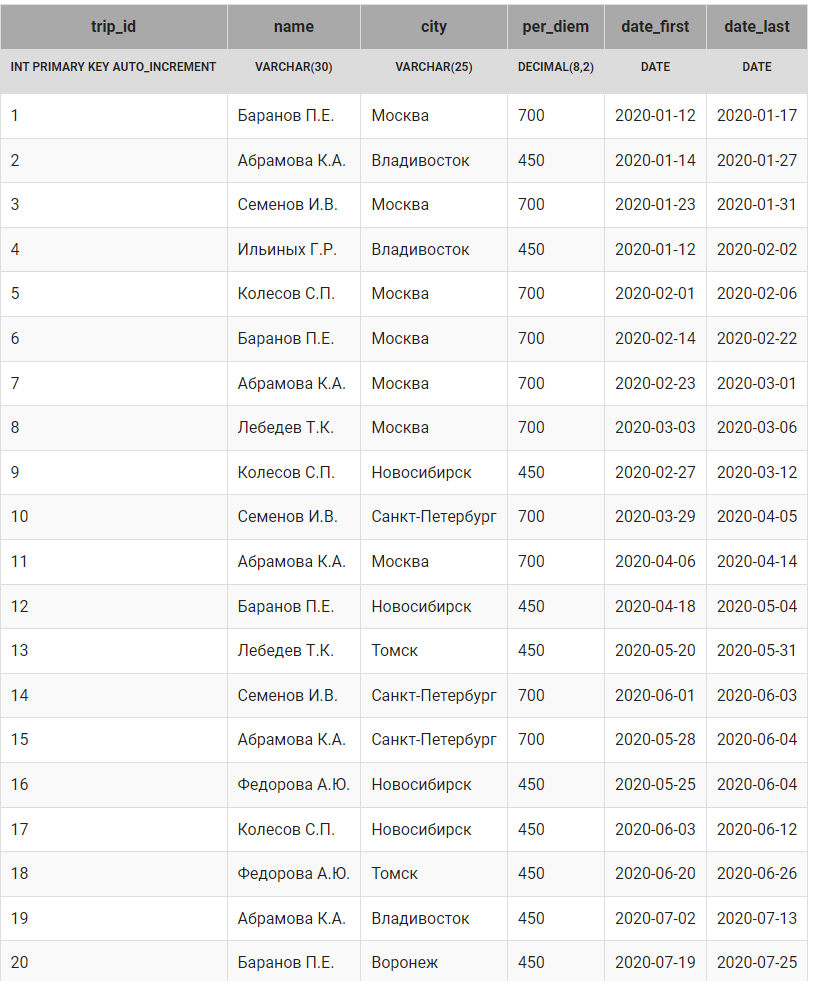

1) Вывести из таблицы trip информацию о командировках тех сотрудников, фамилия которых заканчивается на букву «а», в отсортированном по убыванию даты последнего дня командировки виде. В результат включить столбцы name, city, per_diem, date_first, date_last.
- SELECT name, city, per_diem, date_first, date_last\
FROM trip WHERE name LIKE '%а %' \
ORDER BY date_last DESC

2) Вывести в алфавитном порядке фамилии и инициалы тех сотрудников, которые были в командировке в Москве.
- SELECT DISTINCT name FROM trip WHERE city='Москва' ORDER BY name

3) Для каждого города посчитать, сколько раз сотрудники в нем были.  Информацию вывести в отсортированном в алфавитном порядке по названию городов. Вычисляемый столбец назвать Количество. 
- SELECT city, COUNT(city) AS Количество
FROM trip GROUP BY city ORDER BY city

4) Вывести два города, в которых чаще всего были в командировках сотрудники. Вычисляемый столбец назвать Количество.
- SELECT city, COUNT(city) AS Количество
FROM trip GROUP BY city ORDER BY Количество DESC
LIMIT 2

5) Вывести информацию о командировках во все города кроме Москвы и Санкт-Петербурга (фамилии и инициалы сотрудников, город ,  длительность командировки в днях, при этом первый и последний день относится к периоду командировки). Последний столбец назвать Длительность. Информацию вывести в упорядоченном по убыванию длительности поездки, а потом по убыванию названий городов (в обратном алфавитном порядке).
- SELECT name, city, DATEDIFF(date_last, date_first)+1 AS Длительность\
FROM trip WHERE city NOT IN ('Москва', 'Санкт-Петербург')\
ORDER BY Длительность DESC, city DESC

6) Вывести информацию о командировках сотрудника(ов), которые были самыми короткими по времени. В результат включить столбцы name, city, date_first, date_last.
- SELECT name, city, date_first, date_last FROM trip \
WHERE DATEDIFF(date_last, date_first)=(SELECT MIN(DATEDIFF(date_last, date_first)) FROM trip)

7) Вывести информацию о командировках, начало и конец которых относятся к одному месяцу (год может быть любой). В результат включить столбцы name, city, date_first, date_last. Строки отсортировать сначала  в алфавитном порядке по названию города, а затем по фамилии сотрудника .
- SELECT name, city, date_first, date_last FROM trip\
WHERE MONTH(date_first)=MONTH(date_last)\
ORDER BY city, name

8) Вывести название месяца и количество командировок для каждого месяца. Считаем, что командировка относится к некоторому месяцу, если она началась в этом месяце. Информацию вывести сначала в отсортированном по убыванию количества, а потом в алфавитном порядке по названию месяца виде. Название столбцов – Месяц и Количество.
- SELECT MONTHNAME(date_first) AS Месяц, COUNT(MONTHNAME(date_first)) AS Количество FROM trip GROUP BY Месяц
ORDER BY Количество DESC, Месяц

9) Вывести сумму суточных (произведение количества дней командировки и размера суточных) для командировок, первый день которых пришелся на февраль или март 2020 года. Значение суточных для каждой командировки занесено в столбец per_diem. Вывести фамилию и инициалы сотрудника, город, первый день командировки и сумму суточных. Последний столбец назвать Сумма. Информацию отсортировать сначала  в алфавитном порядке по фамилиям сотрудников, а затем по убыванию суммы суточных.
- SELECT name, city, date_first, ((DATEDIFF(date_last, date_first)+1)\*per_diem) AS Сумма \
FROM trip\
WHERE MONTH(date_first) IN(2, 3) \
ORDER BY name, Сумма DESC

10) Вывести фамилию с инициалами и общую сумму суточных, полученных за все командировки для тех сотрудников, которые были в командировках больше чем 3 раза, в отсортированном по убыванию сумм суточных виде. Последний столбец назвать Сумма.
- SELECT name, SUM(per_diem\*(DATEDIFF(date_last, date_first)+1)) AS Сумма FROM trip \
WHERE name IN(\
    SELECT name FROM trip \
    GROUP BY name\
    HAVING COUNT(name) > 3)\
    \
GROUP BY name\
ORDER BY Сумма DESC

## 1.7 Таблица "Нарушения ПДД", запросы корректировки

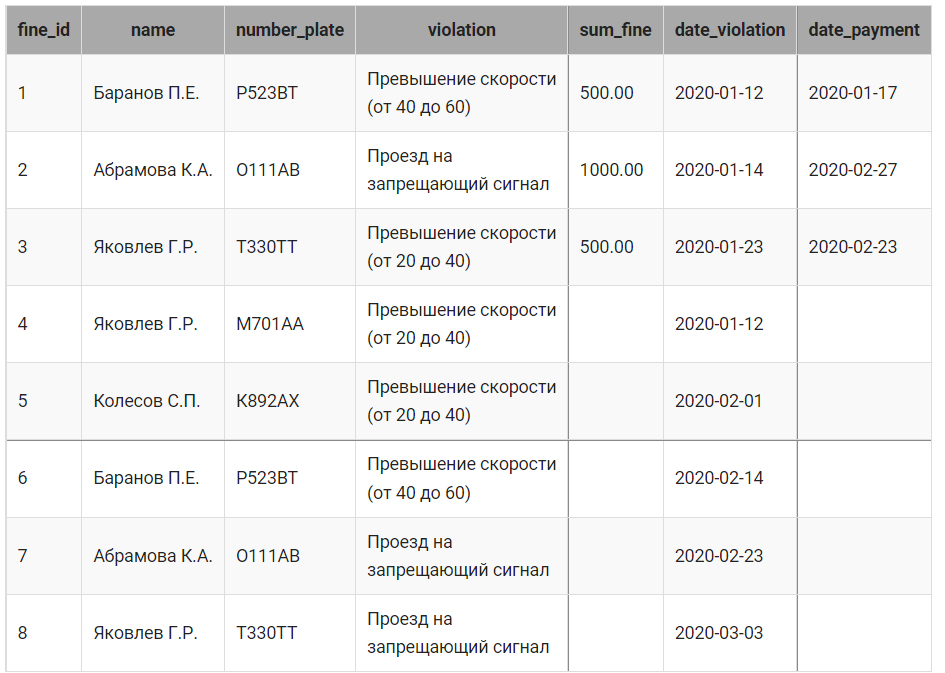

1) Добавить в таблицу записи с ключевыми значениями 6, 7, 8.
- INSERT INTO fine VALUES\
(6, 'Баранов П.Е.', 'Р523ВТ', 'Превышение скорости(от 40 до 60)', null, '2020-02-14', null),\
(7, 'Абрамова К.А.', 'О111АВ', 'Проезд на запрещающий сигнал', null, '2020-02-23', null),\
(8, 'Яковлев Г.Р.', 'Т330ТТ', 'Проезд на запрещающий сигнал', null, '2020-03-03', null);

2) Занести в таблицу fine суммы штрафов, которые должен оплатить водитель, в соответствии с данными из таблицы traffic_violation. При этом суммы заносить только в пустые поля столбца  sum_fine.
- UPDATE fine AS f, traffic_violation AS tv SET f.sum_fine=tv.sum_fine \
WHERE f.violation=tv.violation AND f.sum_fine IS NULL

3) Вывести фамилию, номер машины и нарушение только для тех водителей, которые на одной машине нарушили одно и то же правило   два и более раз. При этом учитывать все нарушения, независимо от того оплачены они или нет. Информацию отсортировать в алфавитном порядке, сначала по фамилии водителя, потом по номеру машины и, наконец, по нарушению.
- SELECT name, number_plate, violation\
FROM fine\
GROUP BY name, number_plate, violation\
HAVING count(\*)>=2\
ORDER BY name, number_plate, violation

4) В таблице fine увеличить в два раза сумму неоплаченных штрафов для отобранных на предыдущем шаге записей. 
- CREATE TABLE vremennaya (SELECT name, violation, number_plate
FROM fine\
GROUP BY name, number_plate, violation\
HAVING count(\*)>=2\
ORDER BY name, number_plate, violation);\
\
UPDATE fine, vremennaya SET fine.sum_fine = fine.sum_fine\*2 \
WHERE fine.date_payment is null AND fine.name = vremennaya.name AND fine.number_plate=vremennaya.number_plate AND fine.violation=vremennaya.violation;

5) 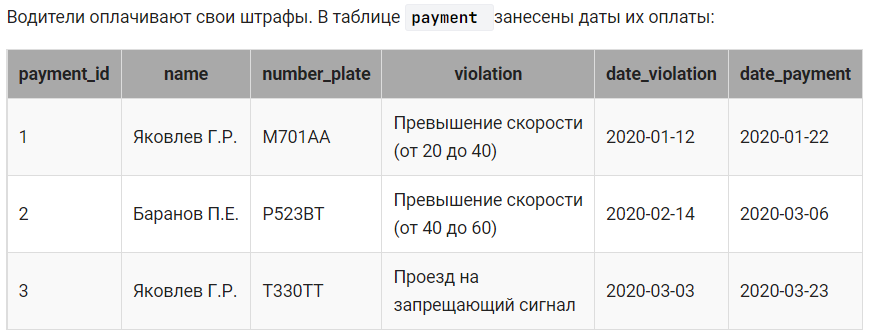
- UPDATE fine, payment\
SET fine.date_payment = payment.date_payment,\
    fine.sum_fine = IF(DATEDIFF(payment.date_payment, fine.date_violation) <= 20, fine.sum_fine/2, fine.sum_fine)\
WHERE fine.name = payment.name AND\
fine.number_plate=payment.number_plate AND\
fine.violation=payment.violation AND  \
fine.date_payment IS NULL

6) Создать новую таблицу back_payment, куда внести информацию о неоплаченных штрафах (Фамилию и инициалы водителя, номер машины, нарушение, сумму штрафа  и  дату нарушения) из таблицы fine.
- CREATE TABLE back_payment (\
    SELECT name, number_plate, violation, sum_fine, date_violation\
    FROM fine\
    WHERE date_payment IS NULL)

7) Удалить из таблицы fine информацию о нарушениях, совершенных раньше 1 февраля 2020 года.
- DELETE FROM fine \
WHERE DATEDIFF(date_violation, '2020.02.01')<0

## 2.1 Связи между таблицами

1) Заполнить таблицу author.
- INSERT INTO author (name_author)\
VALUES \
('Булгаков М.А.'),\
('Достоевский Ф.М.'),\
('Есенин С.А.'),\
('Пастернак Б.Л.')

2) Перепишите запрос на создание таблицы book , чтобы ее структура соответствовала структуре, показанной на логической схеме (таблица genre уже создана, порядок следования столбцов - как на логической схеме в таблице book, genre_id  - внешний ключ) . Для genre_id ограничение о недопустимости пустых значений не задавать. В качестве главной таблицы для описания поля  genre_idиспользовать таблицу genre следующей структуры: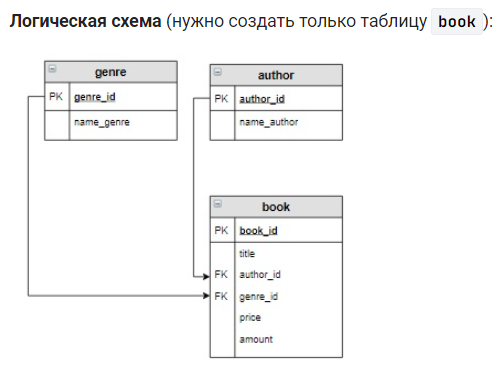
- CREATE TABLE book (\
    book_id INT PRIMARY KEY AUTO_INCREMENT, \
    title VARCHAR(50), \
    author_id INT NOT NULL, \
    genre_id INT,\
    price DECIMAL(8,2), \
    amount INT,\
    FOREIGN KEY (author_id)  REFERENCES author (author_id),\
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id));

3) Создать таблицу book той же структуры, что и на предыдущем шаге. Будем считать, что при удалении автора из таблицы author, должны удаляться все записи о книгах из таблицы book, написанные этим автором. А при удалении жанра из таблицы genre для соответствующей записи book установить значение Null в столбце genre_id. 
- CREATE TABLE book (\
book_id INT PRIMARY KEY AUTO_INCREMENT,\
title VARCHAR(50),\
author_id INT NOT NULL,\
genre_id INT,\
price DECIMAL(8,2),\
amount INT,\
FOREIGN KEY (author_id) REFERENCES author (author_id) ON DELETE CASCADE,\
FOREIGN KEY (genre_id) REFERENCES genre (genre_id) ON DELETE SET NULL)

## 2.2 Запросы на выборку, соединение таблиц